# **SVM: Máquina de Vector de Soporte / Máquinas de soporte vectorial**

SVM, o Máquinas de Soporte Vectorial (Support Vector Machines), es un algoritmo de aprendizaje automático supervisado utilizado para problemas de clasificación y regresión. Su objetivo principal es encontrar el hiperplano óptimo que mejor separa o ajusta los datos según su categoría o valor objetivo.

En clasificación, SVM busca el hiperplano que maximiza el margen entre las clases, es decir, la distancia más corta entre los puntos de datos más cercanos de cada clase. Los puntos de datos más cercanos a este hiperplano son conocidos como **"vectores de soporte"** y juegan un papel crucial en la definición del hiperplano y la toma de decisiones.

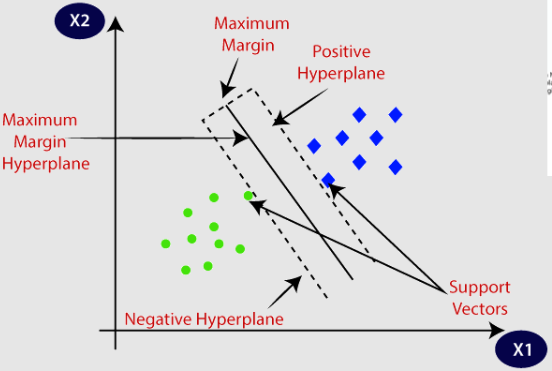



La versatilidad y eficacia de SVM radica en su capacidad para manejar datos en espacios de alta dimensionalidad y su capacidad para aprender relaciones no lineales mediante el uso de "kernels" que transforman los datos en espacios de características más complejas.

SVM ha demostrado ser efectivo en una amplia variedad de aplicaciones, como clasificación de imágenes, detección de spam, diagnóstico médico, entre otros. Su enfoque geométrico y su capacidad para manejar datos complejos lo hacen una herramienta poderosa en el campo del aprendizaje automático.


Video explicativo: https://www.youtube.com/watch?v=Xbd8T-JoGPQ

## **Importar Librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# MODULO DE MVS (SVC: Support Vector Classification)
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## **Importar datos**

In [2]:
datos = pd.read_csv("./Iris.csv", sep=',')
datos.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **Distribución de clases**

In [3]:
print(datos.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## **Separación de datos y normalización**

In [4]:
# separar variables predictoras y etiqueta
X = datos[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = datos['Species'].values

# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalizar



## **Entrenamiento del modelo**

```

Definición de modelo con un kernel radial (rbf)
El parámetro "C" (parámetro de penalización) controla el trade-off entre el ajuste a los datos de entrenamiento y la complejidad del modelo.
- Un valor más alto de C indica que se da más importancia a la clasificación correcta de los datos de entrenamiento (ajuste preciso) lo que puede llevar a una frontera de decisión más compleja.
- Un valor más bajo de C da más importancia a lograr una mayor separación de las clases (frontera de decisión más simple).
En este caso, C se establecerá en 1, lo que indica un enfoque de equilibrio entre el ajuste y la simplicidad del modelo.

```

In [5]:
# definición del modelo
modelo = SVC(kernel='rbf', C=1)

# entrenamiento
modelo.fit(X_train, y_train)

print('Exactitud de SVM en la clasificacion de datos de entrenamiento: {:.2f}'.format(modelo.score(X_train, y_train)))

print('Exactitud de SVM en la clasificacion de datos de tes: {:.2f}'.format(modelo.score(X_test, y_test)))


Exactitud de SVM en la clasificacion de datos de entrenamiento: 0.96
Exactitud de SVM en la clasificacion de datos de tes: 0.97


## **Matriz de confusión y exactitud**

In [6]:
from sklearn.metrics import confusion_matrix
pred = modelo.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [7]:
# accuracy del modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9736842105263158


## **Predicción**

In [9]:
# predicción del modelo
y_pred = modelo.predict([[5, 1.0, 3, 2]])
print(y_pred)

['Iris-versicolor']


# Busqueda de hiperparámetros por cuadricula de búsqueda aleatoria

```
Hiperparámetros a considerar:
1. C: penalización por violar el margen
2. Gamma: controla el alcance de influencia de un solo ejemplo de entrenamiento
en la formación de la frontera de decisión.
- Un valor más alto de gamma indica que un punto de entrenamiento tiene un alcance de influencia más limitado,
lo que da lugar a fronteras de decisión más precisas y detalladas que pueden sobreajustarse
a los puntos de entrenamiento. Sin embargo, un valor alto podría afectar a la función kernel.
- Un valor más bajo de gamma indica que un punto de entrenamiento tiene un alcance
de influencia más amplio, lo que da lugar a fronteras de decisión más suaves y generalizables
que pueden capturar patrones más grandes en los datos.
3. kernel: función kernel a utilizar entre: linear, polynomial, radial, sigmoid
```

In [12]:
# Adaptaciones de Dr. César Beltrán
C = [1, 2, 3, 4, 5, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [0.001, 0.01, 0.1, 0.5, 0.9]

# 6 x 4 x 5 cant. experimentos
cuadricula_busqueda = {'C': C,
                       'kernel': kernel,
                       'gamma': gamma}

# Busqueda aleatoria en cuadricula con validación cruzada
from sklearn.model_selection import RandomizedSearchCV

modelo = SVC()

modelo_resultado = RandomizedSearchCV(estimator=modelo, param_distributions=cuadricula_busqueda, n_iter=50, cv=3, verbose=2, random_state=42)

modelo_resultado.fit(X_train, y_train)

modelo_resultado.score(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .....................C=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=3, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=3, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=3, gamma=0.5, k

1.0

# Mejor modelo

In [13]:
modelo_resultado.best_estimator_

SVC(C=4, gamma=0.5, kernel='poly')

# TAREA
```
Repetir el procedimiento para winequality.csv y obtener una exactitud > 98%
```